In [1]:
!pip install pandas numpy scikit-learn matplotlib




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\karth\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\karth\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\karth\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\karth\AppData\Roaming\Python\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\karth\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\karth\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\karth\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\karth\AppData\Roaming\Python\

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



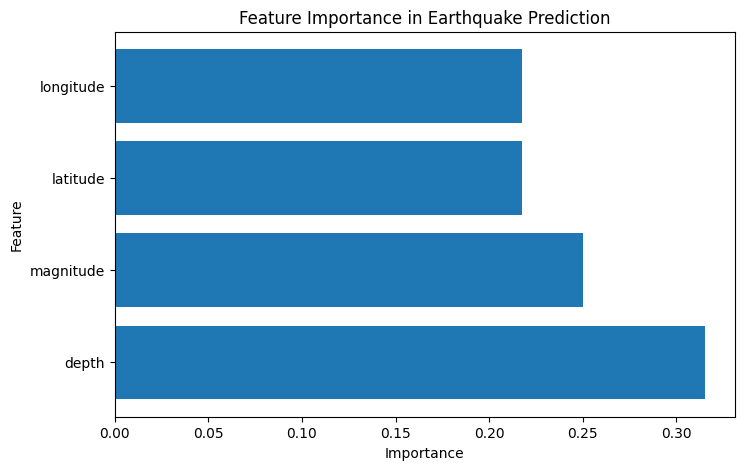

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create sample dataset
data = {
    'magnitude': [4.5, 5.2, 3.8, 6.1, 7.3, 2.9, 5.8, 6.5, 3.5, 4.8],
    'depth': [10, 15, 8, 30, 50, 5, 25, 40, 6, 12],
    'latitude': [34.1, 36.2, 37.5, 35.3, 33.7, 38.4, 36.5, 34.8, 37.0, 35.9],
    'longitude': [-118.2, -117.5, -119.1, -116.8, -115.3, -120.5, -117.9, -118.7, -119.5, -117.2],
    'earthquake_occurred': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Preprocess data
features = ['magnitude', 'depth', 'latitude', 'longitude']  # Modify based on dataset
X = df[features]
y = df['earthquake_occurred']  # 1 if earthquake occurred, 0 otherwise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Earthquake Prediction")
plt.show()


In [3]:
!pip install numpy pandas tensorflow scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from sklearn.model_selection import train_test_split

# Load the dataset
try:
    df = pd.read_csv("database.csv")
    print("Dataset loaded successfully with", len(df), "entries")
    print(df.head())  # Show first 5 rows
except FileNotFoundError:
    print("Error: database.csv not found. Please place the file in the same directory.")

# Data preprocessing
def preprocess_data(df):
    # Handle mixed date formats
    def parse_datetime(date_str, time_str):
        try:
            # Try MM/DD/YYYY format first
            return datetime.strptime(f"{date_str} {time_str}", "%m/%d/%Y %H:%M:%S")
        except ValueError:
            try:
                # Fallback to ISO8601 format
                return datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%S.%fZ")
            except ValueError:
                return np.nan
    
    df['DateTime'] = df.apply(lambda x: parse_datetime(x['Date'], x['Time']), axis=1)
    df = df.dropna(subset=['DateTime'])  # Remove rows with invalid dates
    
    # Convert datetime to seconds since epoch
    epoch = datetime(1970, 1, 1)
    df['Timestamp'] = (df['DateTime'] - epoch).dt.total_seconds()
    
    # Select features and target
    features = ['Timestamp', 'Latitude', 'Longitude', 'Depth']
    target = 'Magnitude'
    
    # Filter out rows with missing values
    df_clean = df.dropna(subset=features + [target])
    
    # Convert to numpy arrays
    X = df_clean[features].to_numpy()
    y = df_clean[target].to_numpy()
    
    return X, y, df_clean[features]

# Preprocess the data
X, y, feature_df = preprocess_data(df)
print("\nSample features:")
print(feature_df.head())
print("\nSample target values:", y[:5])

# Normalize the features
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_norm = (X - X_min) / (X_max - X_min)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Build the model
def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model((X_train.shape[1],))
model.summary()

# Train the model
print("\nTraining the model...")
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,  # Reduced for demo (you can increase later)
    validation_data=(X_val, y_val),
    verbose=1
)

# Save the model
model.save('earthquake_model.h5')
print("\nModel saved as earthquake_model.h5")

# Prediction function
def predict_magnitude(date, time, lat, long, depth):
    try:
        # Create datetime object
        dt = datetime.strptime(f"{date} {time}", "%m/%d/%Y %H:%M:%S")
        timestamp = (dt - datetime(1970, 1, 1)).total_seconds()
        
        # Prepare input array
        input_data = np.array([[timestamp, lat, long, depth]])
        input_norm = (input_data - X_min) / (X_max - X_min)
        
        # Make prediction
        prediction = model.predict(input_norm)
        return prediction[0][0]
    
    except Exception as e:
        print(f"Error in prediction: {e}")
        return None

# Example prediction
sample = df.iloc[4]  # Using the 5th earthquake in the dataset as an example
pred_magnitude = predict_magnitude(
    sample['Date'], 
    sample['Time'], 
    sample['Latitude'], 
    sample['Longitude'], 
    sample['Depth']
)

print(f"\nExample Prediction for {sample['Date']} {sample['Time']}:")
print(f"Actual Magnitude: {sample['Magnitude']}")
print(f"Predicted Magnitude: {pred_magnitude:.2f}")

Dataset loaded successfully with 23412 entries
         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            N

C:\Users\karth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,593 (25.75 KB)

 Trainable params: 6,593 (25.75 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.9279 - mae: 0.7766 - val_loss: 0.1892 - val_mae: 0.3260
Epoch 2/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1811 - mae: 0.3160 - val_loss: 0.1904 - val_mae: 0.3418
Epoch 3/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1821 - mae: 0.3173 - val_loss: 0.1914 - val_mae: 0.3005
Epoch 4/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1806 - mae: 0.3157 - val_loss: 0.1850 - val_mae: 0.3262
Epoch 5/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1798 - mae: 0.3152 - val_loss: 0.1870 - val_mae: 0.3321
Epoch 6/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1802 - mae: 0.3152 - val_loss: 0.1887 - val_mae: 0.3391
Epoch 7/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1813 - mae: 0.3155 - val_loss: 0.1832 - val_mae: 0.3213
Epoch 8/50
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1806 - mae: 0.3146 - val_loss: 0.1934 - val_mae: 0.3517
Epoch 9/50
586/586 ━━━━━━━━━━━━━━


Model saved as earthquake_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step

Example Prediction for 01/09/1965 13:32:50:
Actual Magnitude: 5.8
Predicted Magnitude: 6.09


In [5]:
!pip install plotly


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


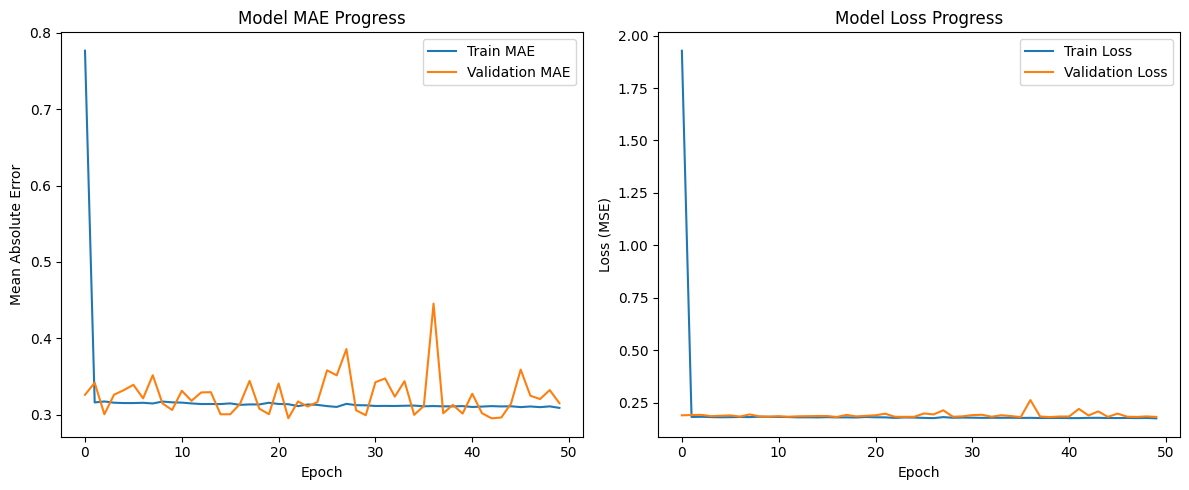

In [6]:
# 1. Training Progress Visualization
plt.figure(figsize=(12, 5))

# MAE Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Progress')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


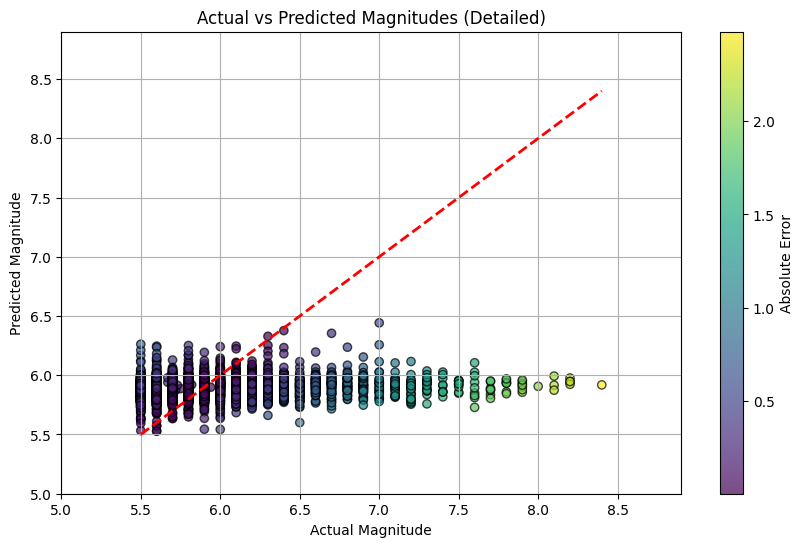

In [7]:
# 2. Actual vs Predicted Scatter Plot
y_pred = model.predict(X_val).flatten()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_val, y_pred, c=np.abs(y_val - y_pred), cmap='viridis', alpha=0.7, edgecolors='k')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', linewidth=2)
plt.colorbar(scatter, label='Absolute Error')
plt.title('Actual vs Predicted Magnitudes (Detailed)')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.grid(True)
plt.xlim(min(y_val) - 0.5, max(y_val) + 0.5)
plt.ylim(min(y_val) - 0.5, max(y_val) + 0.5)
plt.show()
